In [1]:
import pandas as pd
import numpy as np

In [8]:
seeds_df=pd.read_csv("D:\data science\csv\seeds.csv")

In [10]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [11]:
varieties=seeds_df.grain_variety

In [14]:
del seeds_df['grain_variety']

In [18]:
samples=seeds_df.values
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [19]:
from sklearn.cluster import KMeans

In [22]:
ks=range(1,6)
inertias=[] #intra distance between cluster

In [26]:
for k in ks:
    #create a kmeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    #Fit the model to samples
    model.fit(samples)
    
    #Append inertieas to the list of inertias
    inertias.append(model.inertia_)

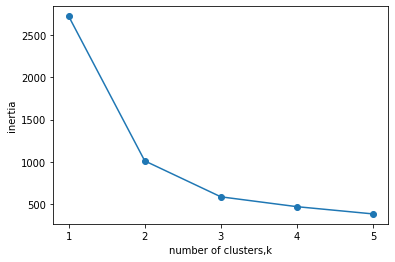

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot ks vs inertia
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters,k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [28]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [29]:
df = pd.DataFrame({'labels':labels,'varities':varieties})

In [30]:
ct=pd.crosstab(df['labels'],df['varities'])

In [31]:
ct

varities,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,68,9,0
2,2,60,10
